In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 读取csv文件
data = pd.read_csv('./data/infer_file.csv')

In [2]:
# 将数据划分为训练集和测试集
inp_df = data.iloc[:, 3:]
x_train, x_test, y_train, y_test = train_test_split(
                                                    inp_df.iloc[:, :-1], 
                                                    inp_df["y"], 
                                                    test_size=0.3, 
                                                    random_state=3
                                                    )

Mean Squared Error: 10.11


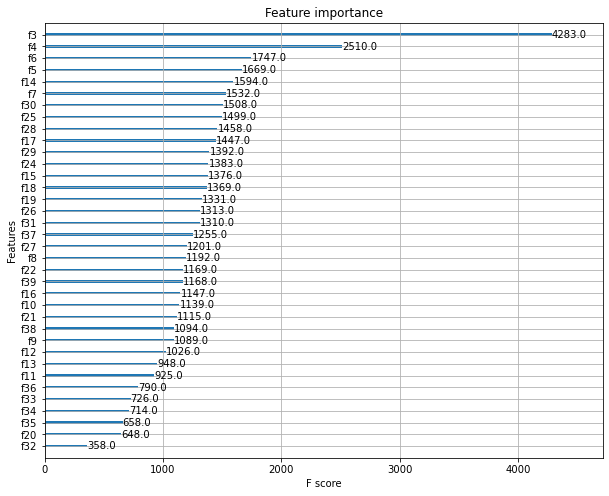

In [3]:
# 定义XGBoost模型
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=6)

# 模型训练与评估
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = ((y_pred - y_test) ** 2).mean()
print('Mean Squared Error: {:.2f}'.format(mse))

# 分析特征贡献度
fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(model, ax=ax)
plt.show()

In [13]:
y_pred

array([17.454252, 12.582292, 12.826176, ..., 14.871118, 38.840786,
       15.819269], dtype=float32)